<a href="https://colab.research.google.com/github/YoofKhaneja/Heart_Disease_Prediction/blob/master/Codes/NN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing standard libraries

In [0]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Seeding values
### This is done so that code values stay uniform

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(0)

# Reading the data into a dataframe

In [3]:
url = 'https://raw.githubusercontent.com/YoofKhaneja/Heart_Disease_Prediction/master/Codes/framingham.csv'
hd = pd.read_csv(url)
hd.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Data exploration

In [4]:
print('Total patients: ', hd.shape[0])
print('Total attributes: ', hd.shape[1] - 1)
print('Number of labels: ', 1, '(', hd.columns[15], ')')

Total patients:  4240
Total attributes:  15
Number of labels:  1 ( TenYearCHD )


In [5]:
hd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


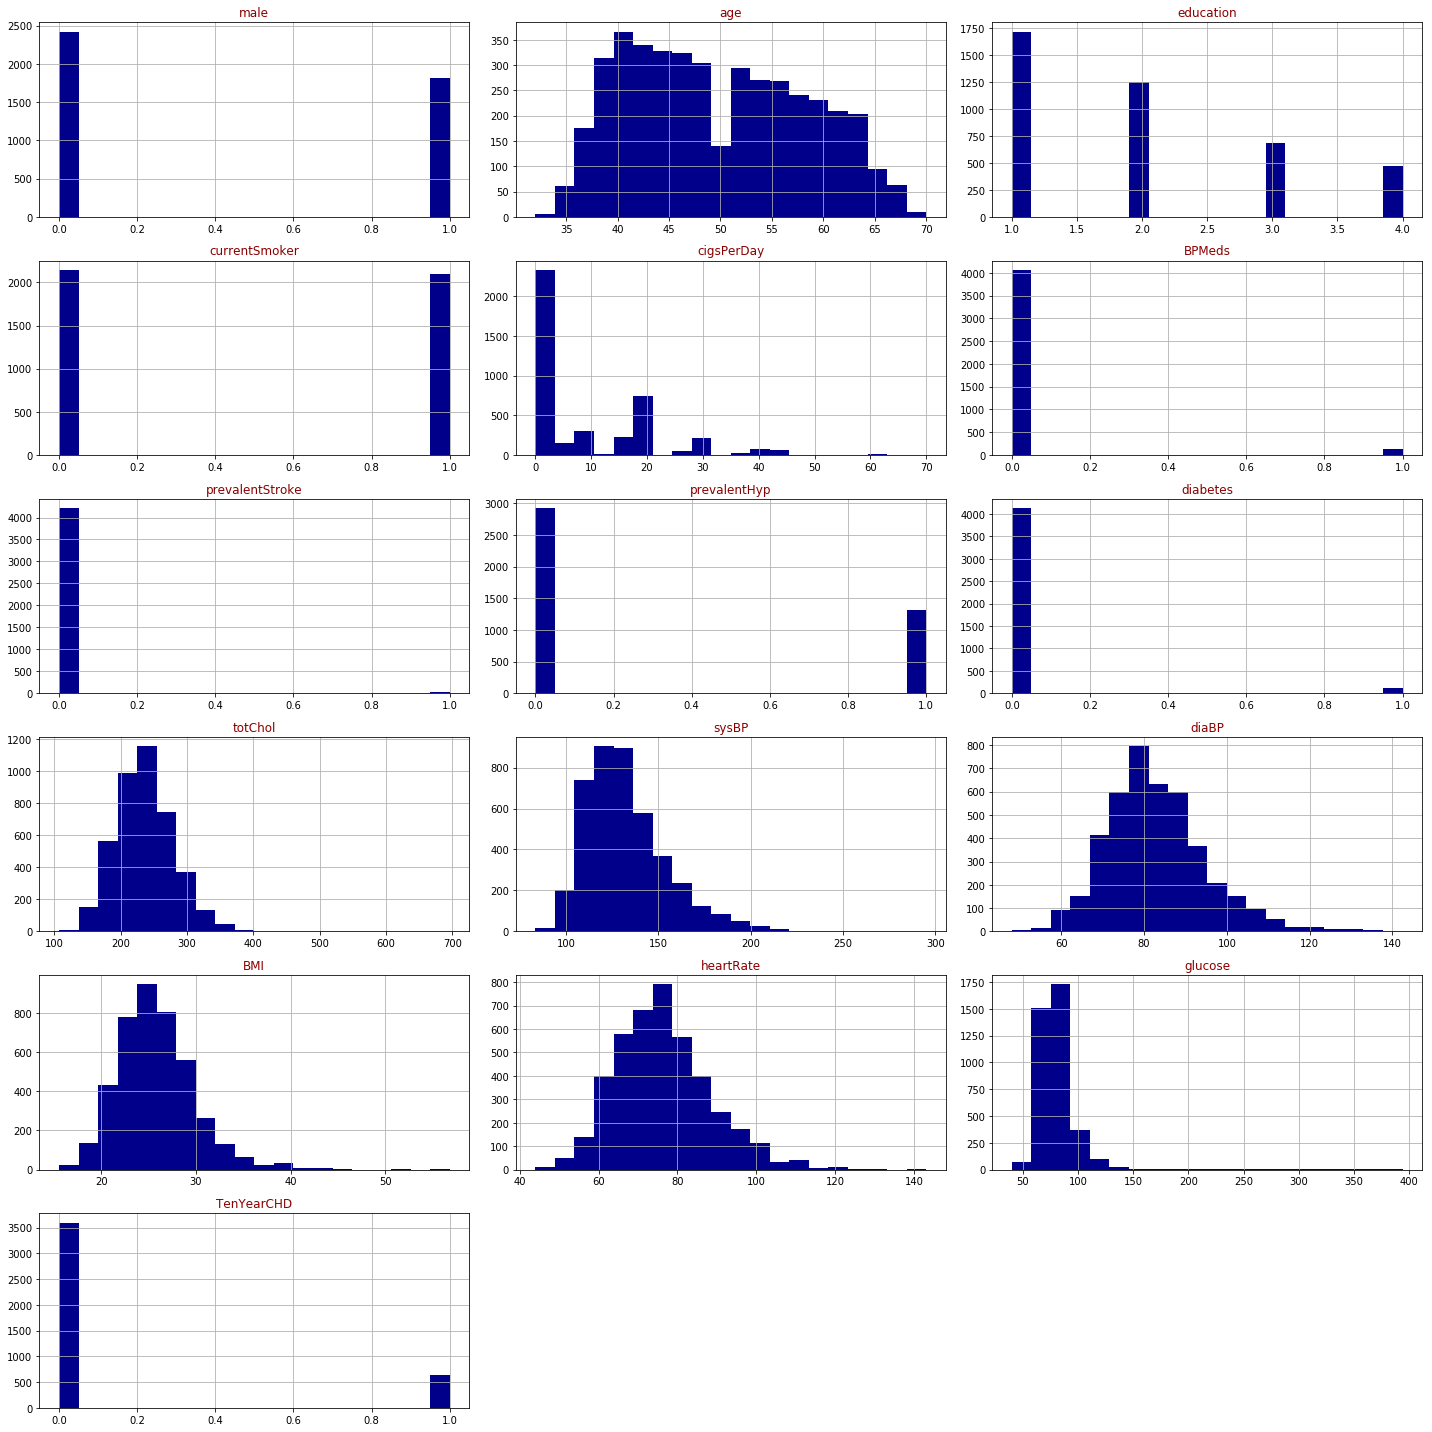

In [6]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'DarkBlue')
        ax.set_title(feature, color = 'DarkRed')
    fig.tight_layout()  
    plt.show()
draw_histograms(hd, hd.columns, 6, 3)

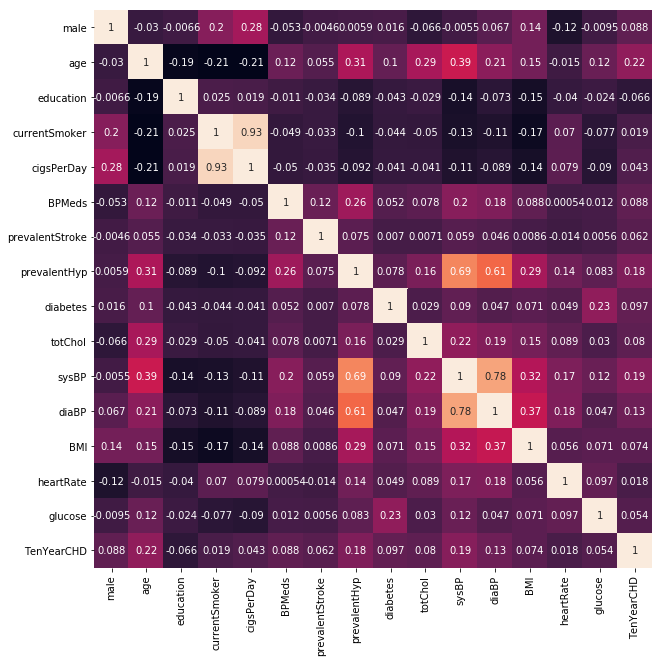

In [7]:
corr = hd.corr(method = 'spearman')
plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3596


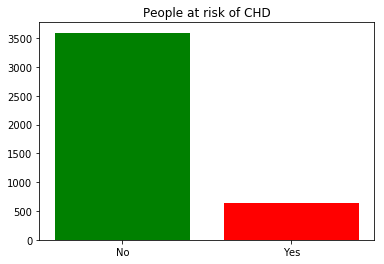

In [8]:
from collections import Counter
chdc = Counter(hd['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

In [9]:
print('Missing values: ')
print(hd.isnull().sum())
mv = np.array(hd.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)
tr = 0
for i in hd.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total missing attributes:  645

Total rows with missing data:  582


# Dropping irrelevant columns and rows with missing data

In [10]:
hd.drop(['education'], axis = 1, inplace = True)
hd.dropna(axis = 0, inplace = True)
hd.shape

(3751, 15)

# Creating the training and testing data

In [0]:
attrib = hd.iloc[:, :-1]
lab = hd.iloc[:, -1]

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 1)
attrib = np.array(attrib)
lab = np.array(lab)
for train_index, test_index in sss.split(attrib, lab):
    x_train, x_test = attrib[train_index], attrib[test_index]
    y_train, y_test = lab[train_index], lab[test_index]

# Creating and compiling the neural network model
### The model contains two hidden layers, each with 200 neurons. Dropout and regularization are applied to ensure that there is no overfitting

In [13]:
from keras import Sequential, regularizers
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(200, input_dim = 14,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01))) 
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A1'))
model.add(Dense(200,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A2'))
model.add(Dense(1,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [14]:
model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               3000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
A1 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
A2 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
__________

# Defining functions to better understand the training process
### One function prints the average accuracy and loss, the other plots the values for loss and accuracy accross a training session


In [0]:
def stats_avg(history, i):
    val_acc = np.array(history.history['val_acc'])
    val_loss = np.array(history.history['val_loss'])
    model_acc = np.array(history.history['acc'])
    model_loss = np.array(history.history['loss'])
    print('Average validation loss:', val_loss.sum()/i)
    print('Average validation accuracy:', val_acc.sum()/i)
    print('Average loss:', model_loss.sum()/i)
    print('Average accuracy:', model_acc.sum()/i)

In [0]:
def plots(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Training the model

Instructions for updating:
Use tf.cast instead.
Train on 2250 samples, validate on 750 samples
Epoch 1/50
2250/2250 [==============================] - 2s 735us/step - loss: 1099.0206 - acc: 0.4591 - val_loss: 129.5562 - val_acc: 0.3440
Epoch 2/50
2250/2250 [==============================] - 0s 189us/step - loss: 94.2174 - acc: 0.4231 - val_loss: 77.6168 - val_acc: 0.3640
Epoch 3/50
2250/2250 [==============================] - 0s 196us/step - loss: 59.2590 - acc: 0.4333 - val_loss: 50.1116 - val_acc: 0.3520
Epoch 4/50
2250/2250 [==============================] - 0s 192us/step - loss: 42.6352 - acc: 0.4178 - val_loss: 40.5301 - val_acc: 0.2480
Epoch 5/50
2250/2250 [==============================] - 0s 194us/step - loss: 36.3666 - acc: 0.4049 - val_loss: 36.3214 - val_acc: 0.2333
Epoch 6/50
2250/2250 [==============================] - 0s 191us/step - loss: 33.4765 - acc: 0.4027 - val_loss: 34.3185 - val_acc: 0.2333
Epoch 7/50
2250/2250 [==============================] - 0s 188us/step - lo

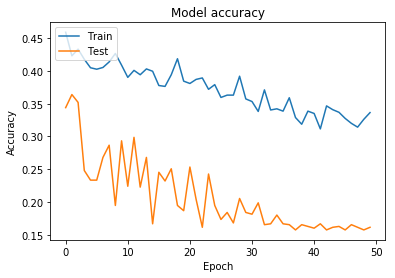

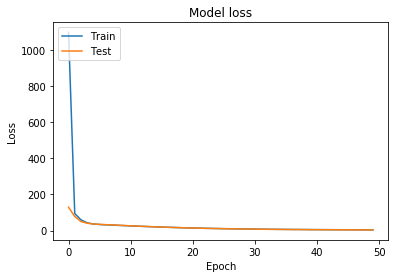

Train on 2250 samples, validate on 750 samples
Epoch 1/50
2250/2250 [==============================] - 0s 200us/step - loss: 3.7735 - acc: 0.3480 - val_loss: 3.3832 - val_acc: 0.1587
Epoch 2/50
2250/2250 [==============================] - 0s 190us/step - loss: 3.6726 - acc: 0.3289 - val_loss: 3.3000 - val_acc: 0.1587
Epoch 3/50
2250/2250 [==============================] - 0s 190us/step - loss: 3.6274 - acc: 0.3373 - val_loss: 3.2513 - val_acc: 0.1600
Epoch 4/50
2250/2250 [==============================] - 0s 194us/step - loss: 3.5482 - acc: 0.3244 - val_loss: 3.1801 - val_acc: 0.1587
Epoch 5/50
2250/2250 [==============================] - 0s 193us/step - loss: 3.4342 - acc: 0.3507 - val_loss: 3.3477 - val_acc: 0.3440
Epoch 6/50
2250/2250 [==============================] - 0s 195us/step - loss: 3.3511 - acc: 0.3391 - val_loss: 2.9870 - val_acc: 0.1573
Epoch 7/50
2250/2250 [==============================] - 0s 190us/step - loss: 3.2747 - acc: 0.3262 - val_loss: 2.9532 - val_acc: 0.1573
E

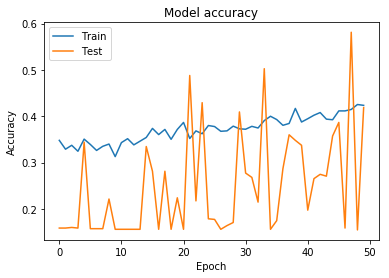

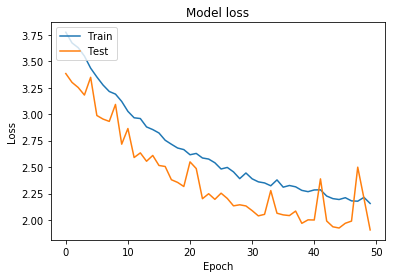

Train on 2250 samples, validate on 750 samples
Epoch 1/50
2250/2250 [==============================] - 0s 199us/step - loss: 2.1596 - acc: 0.4013 - val_loss: 1.9517 - val_acc: 0.2373
Epoch 2/50
2250/2250 [==============================] - 0s 194us/step - loss: 2.1903 - acc: 0.3787 - val_loss: 1.8934 - val_acc: 0.2720
Epoch 3/50
2250/2250 [==============================] - 0s 201us/step - loss: 2.1293 - acc: 0.4249 - val_loss: 1.8944 - val_acc: 0.3507
Epoch 4/50
2250/2250 [==============================] - 0s 197us/step - loss: 2.1389 - acc: 0.4271 - val_loss: 1.8931 - val_acc: 0.4027
Epoch 5/50
2250/2250 [==============================] - 0s 188us/step - loss: 2.1629 - acc: 0.4187 - val_loss: 1.9247 - val_acc: 0.6800
Epoch 6/50
2250/2250 [==============================] - 0s 197us/step - loss: 2.0696 - acc: 0.4289 - val_loss: 1.9030 - val_acc: 0.5747
Epoch 7/50
2250/2250 [==============================] - 0s 190us/step - loss: 2.1122 - acc: 0.4333 - val_loss: 1.8846 - val_acc: 0.2467
E

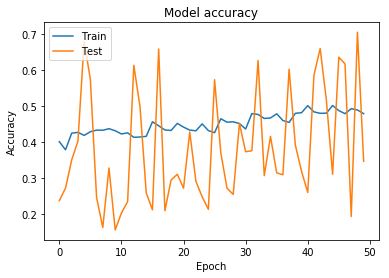

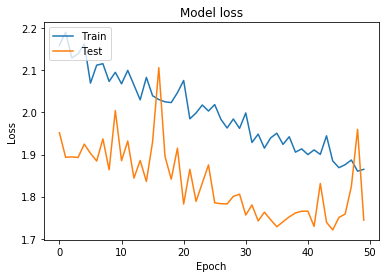

Train on 2250 samples, validate on 750 samples
Epoch 1/50
2250/2250 [==============================] - 1s 226us/step - loss: 1.8482 - acc: 0.5076 - val_loss: 1.9019 - val_acc: 0.6933
Epoch 2/50
2250/2250 [==============================] - 0s 219us/step - loss: 1.8387 - acc: 0.5018 - val_loss: 1.7053 - val_acc: 0.6200
Epoch 3/50
2250/2250 [==============================] - 1s 222us/step - loss: 1.8589 - acc: 0.5000 - val_loss: 1.7304 - val_acc: 0.2467
Epoch 4/50
2250/2250 [==============================] - 0s 218us/step - loss: 1.8546 - acc: 0.5173 - val_loss: 1.7431 - val_acc: 0.4573
Epoch 5/50
2250/2250 [==============================] - 0s 222us/step - loss: 1.8302 - acc: 0.4853 - val_loss: 1.7540 - val_acc: 0.4253
Epoch 6/50
2250/2250 [==============================] - 0s 218us/step - loss: 1.8228 - acc: 0.5080 - val_loss: 1.6756 - val_acc: 0.3013
Epoch 7/50
2250/2250 [==============================] - 0s 222us/step - loss: 1.8338 - acc: 0.5147 - val_loss: 1.7002 - val_acc: 0.2680
E

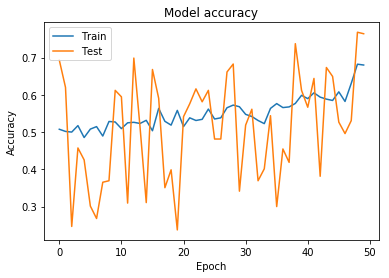

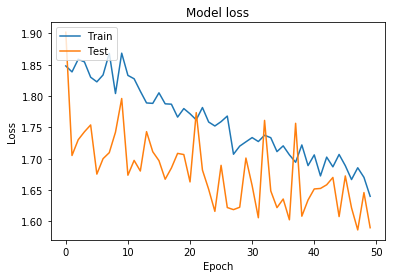

Train on 2250 samples, validate on 750 samples
Epoch 1/50
2250/2250 [==============================] - 0s 204us/step - loss: 1.6773 - acc: 0.6707 - val_loss: 1.5934 - val_acc: 0.6893
Epoch 2/50
2250/2250 [==============================] - 0s 194us/step - loss: 1.6722 - acc: 0.6760 - val_loss: 1.6081 - val_acc: 0.4333
Epoch 3/50
2250/2250 [==============================] - 0s 190us/step - loss: 1.6469 - acc: 0.6862 - val_loss: 1.5951 - val_acc: 0.5920
Epoch 4/50
2250/2250 [==============================] - 0s 197us/step - loss: 1.6508 - acc: 0.6942 - val_loss: 1.6452 - val_acc: 0.3760
Epoch 5/50
2250/2250 [==============================] - 0s 190us/step - loss: 1.6489 - acc: 0.6778 - val_loss: 1.5966 - val_acc: 0.7187
Epoch 6/50
2250/2250 [==============================] - 0s 195us/step - loss: 1.6562 - acc: 0.6849 - val_loss: 1.6961 - val_acc: 0.6653
Epoch 7/50
2250/2250 [==============================] - 0s 193us/step - loss: 1.6697 - acc: 0.6596 - val_loss: 1.8425 - val_acc: 0.3667
E

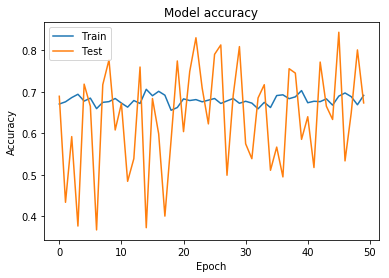

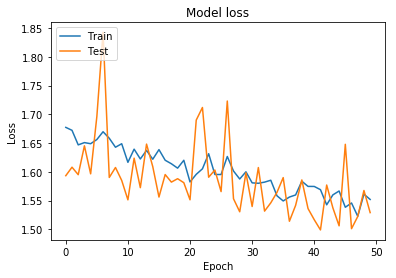

In [17]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', 
                              factor = 0.5,
                              patience = 1, min_lr = 0.0001)
#n_epochs = [100, 80, 60, 40, 20]
class_weights = {0:1.0, 1:5.0}
for i in range(5):    
    history = model.fit(x_train, y_train, 
          validation_split = 0.25, 
          batch_size = 20, 
          epochs = 50,
          verbose = 1,
          callbacks = [reduce_lr],
          class_weight = class_weights)
    stats_avg(history, i = 50)
    plots(history)
    

# Testing and evaluating the model

In [0]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

Accuracy: 0.6524633821571239


,Predicted: 0,Predicted: 1
Actual:0,414,222
Actual:1,39,76


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76       636
           1       0.26      0.66      0.37       115

   micro avg       0.65      0.65      0.65       751
   macro avg       0.58      0.66      0.56       751
weighted avg       0.81      0.65      0.70       751

